In [1]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#importing dataset
dataset = pd.read_csv('Classified Data', index_col =0)
dataset.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
#PREROCESSING THE DATA. STANDARDIZING THE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dataset.drop('TARGET CLASS', axis=1))
scaled_feature = scaler.transform(dataset.drop('TARGET CLASS', axis =1))

In [6]:
#DATASET OF TRANSFORMED FEATURES
df_feat = pd.DataFrame(scaled_feature,columns=dataset.columns[:-1])
df_feat.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.394440e-16,-2.658984e-16,-9.992007e-17,-1.432188e-16,-6.134537e-16,2.486900e-17,6.682432e-16,-4.778400e-16,3.358980e-16,4.650169e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.678050e+00,-2.618747e+00,-2.275858e+00,-2.775551e+00,-2.947206e+00,-2.660802e+00,-2.620466e+00,-2.674465e+00,-2.701361e+00,-3.542140e+00
25%,-7.161683e-01,-6.702761e-01,-7.504105e-01,-7.279635e-01,-6.637361e-01,-7.127975e-01,-7.020467e-01,-7.120098e-01,-7.626629e-01,-6.863610e-01
50%,-3.180217e-02,1.628137e-02,-7.159299e-02,-2.293699e-02,1.433731e-02,-7.940354e-03,-7.093937e-02,-2.236584e-02,2.488297e-02,6.194010e-02
75%,7.378939e-01,7.534412e-01,6.664646e-01,6.631695e-01,6.820374e-01,7.012930e-01,6.723000e-01,7.311915e-01,7.661087e-01,6.961851e-01
max,2.667092e+00,2.799904e+00,3.049325e+00,4.151021e+00,2.538987e+00,2.825739e+00,2.940974e+00,2.470109e+00,2.477734e+00,2.602476e+00


In [7]:
#AGAIN USING LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest = train_test_split(df_feat, dataset['TARGET CLASS'], test_size=0.4, random_state=9281)

In [8]:
#USIGN KNeighboursClassifier 
from sklearn.neighbors import KNeighborsClassifier
knnClassifier = KNeighborsClassifier(n_neighbors=8)

In [9]:
knnClassifier.fit(xtrain,ytrain)

pred = knnClassifier.predict(xtest)

In [10]:
#USING METRICS TO CALCULATE ERROR
from sklearn.metrics import mean_squared_error as mse
mse(ytest,pred)

0.06

In [11]:
#SCORE OF THE MODEL
knnClassifier.score(xtest,ytest)

0.94

In [14]:
#ERROR RATE OF THE MODEL
error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    pred = knn.predict(xtest)
    error_rate.append(np.mean(pred != ytest))
    print(error_rate[i-1])

0.0725
0.0775
0.07
0.0675
0.065
0.0625
0.07
0.06
0.06
0.055
0.0625
0.055
0.0575
0.05
0.0525
0.0575
0.05
0.05
0.055


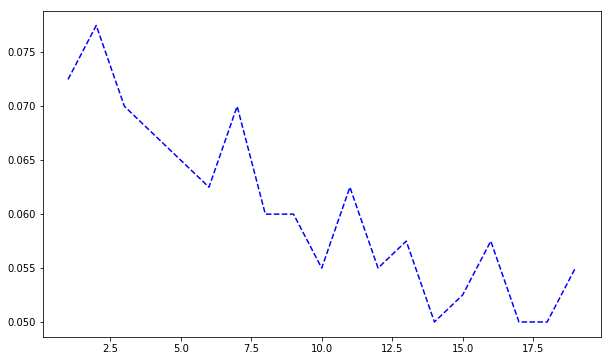

In [15]:
#VIZUALIZE A PLOT OF MY ERROR RATE
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate, color='blue',linestyle='dashed')

In [ ]:
#THANK YOU
